In [1]:
"""Cargar librerias, data de entrenamiento y visualizar """

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


filename = 'D:\Proyectos de programacion\Hackaton\Price Book\Book_Price-Repo\Participants_Data\Data_Train.xlsx'
data_train = pd.read_excel(filename)
data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [2]:
data_test= pd.read_excel('D:\Proyectos de programacion\Hackaton\Price Book\Book_Price-Repo\Participants_Data\Data_Test.xlsx')
data_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [3]:
y_test = pd.read_excel('Participants_Data\Sample_Submission.xlsx')
y_test.head()

,Price
0,119
1,123
2,108
3,118
4,132


In [4]:
data_train.shape, data_test.shape, y_test.shape

((6237, 9), (1560, 8), (1560, 1))

In [5]:
data_train.info(), data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Rati

(None, None)

In [6]:
"""Transformar a float Reviews y Ratings"""

data_train['Reviews'] = data_train.Reviews.apply(lambda r: float(r.split()[0]))
data_train['Ratings']= data_train.Ratings.str.extract('(\d+)')
data_train["Ratings"] = data_train.Ratings.astype(float)

data_test['Ratings'] = data_test.Ratings.str.extract('(\d+)')
data_test['Ratings'] = data_test.Ratings.astype(float)
data_test['Reviews'] = data_test.Reviews.apply(lambda e: float(e.split()[0]))


In [7]:

data_test.head()


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4,960.0,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0,1.0,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0,4.0,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1,11.0,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4,9.0,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [8]:
"""cantidad de valores unicos en Bookcategory, Genre, Author y Title """

len(data_train['BookCategory'].unique()), len(data_train['Genre'].unique()), len(data_train['Author'].unique()), len(data_train.Title.unique())

(11, 345, 3679, 5568)

In [9]:
"""Reemplazar los valores unicos de BookCategory por numeros en un diccionario"""

BookCategory_Values_X = data_train['BookCategory'].unique()

dict_BookCategory_X = (dict((x,BookCategory_Values_X[x] )for x in range(len(BookCategory_Values_X))))

for i in range(len(BookCategory_Values_X)): 
    data_train['BookCategory']= data_train['BookCategory'].replace({BookCategory_Values_X[i]:i })

BookCategory_Values_y = data_test['BookCategory'].unique()

dict_BookCategory_y = (dict((y,BookCategory_Values_y [y])for y in range(len(BookCategory_Values_y))))

for i in range(len(BookCategory_Values_y)):
    data_test['BookCategory'] = data_test.BookCategory.replace({BookCategory_Values_y[i]: i})




In [10]:
"""Reemplazar los valores unicos de Genre por numeros en un diccionario"""

Genre_values = data_train['Genre'].unique()

dict_Genre= (dict((x,Genre_values[x] )for x in range(len(Genre_values))))

for i in range(len(Genre_values)): 
    data_train['Genre']= data_train['Genre'].replace({Genre_values[i]: i })



Genre_values_y = data_test['Genre'].unique()

dict_Genre_y = (dict((y, Genre_values_y[y]) for y in range(len(Genre_values_y))))
for i in range(len(Genre_values_y)):
    
    data_test['Genre']= data_test['Genre'].replace({Genre_values_y[i]: i })





In [11]:
"""Reemplazar los valores unicos de autor por numeros de una key de un diccionario"""

Author_values = data_train.Author.unique()
dict_Author = (dict((x,Author_values[x])for x in range(len(Author_values))))

for i in range(len(Author_values)): 
    data_train['Author']= data_train['Author'].replace({Author_values[i]: i })

Author_values_y = data_test.Author.unique()
dict_Author = (dict((y, Author_values_y[y])for y in range(len(Author_values_y))))

for i in range(len(Author_values_y)): 
    data_test['Author']= data_test['Author'].replace({Author_values_y[i]: i })




In [12]:
"""Eliminando las columnas Edition, Synopsis, Title"""

data_train = data_train.drop(['Edition', 'Synopsis', 'Title'], axis=1)

data_test = data_test.drop(['Edition', 'Synopsis', 'Title'], axis=1)

In [13]:
data_train.describe(), data_test.describe()

(            Author      Reviews      Ratings        Genre  BookCategory  \
 count  6237.000000  6237.000000  6237.000000  6237.000000   6237.000000   
 mean   1388.410454     4.293202    29.828122    54.150553      4.550104   
 std    1086.426906     0.662501    84.139256    69.364410      3.156176   
 min       0.000000     1.000000     1.000000     0.000000      0.000000   
 25%     395.000000     4.000000     2.000000     6.000000      2.000000   
 50%    1168.000000     4.400000     6.000000    23.000000      4.000000   
 75%    2259.000000     4.800000    21.000000    84.000000      7.000000   
 max    3678.000000     5.000000   973.000000   344.000000     10.000000   
 
               Price  
 count   6237.000000  
 mean     560.707516  
 std      690.110657  
 min       25.000000  
 25%      249.180000  
 50%      373.000000  
 75%      599.000000  
 max    14100.000000  ,
             Author      Reviews      Ratings       Genre  BookCategory
 count  1560.000000  1560.000000  

In [27]:
matrix_corr_spearman = data_train.corr('spearman')


In [26]:
matrix_corr_pearson = data_train.corr('pearson')

<function matplotlib.pyplot.show(close=None, block=None)>

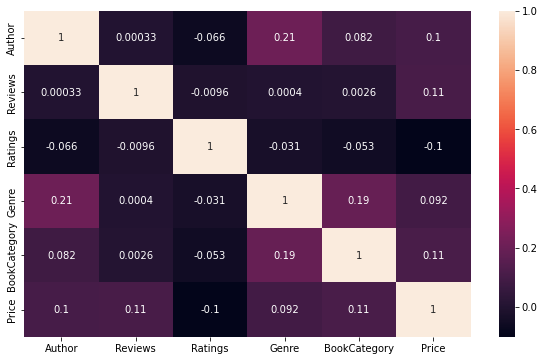

In [34]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(matrix_corr_pearson, annot=True)
plt.show

In [14]:
y_train = data_train['Price'].values
X_train = data_train.drop(['Price'], axis=1)
X_train= X_train.values
X_test = data_test.values
y_test = y_test.values

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [16]:
model.feature_importances_

array([0.32930712, 0.14419428, 0.18195532, 0.21667738, 0.1278659 ])

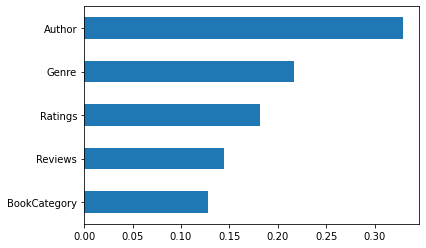

In [17]:
feat_importance = pd.Series(model.feature_importances_,index=data_train.drop(['Price'], axis=1).columns)
figure = feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.show()


In [18]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf_model = RandomForestRegressor()

In [19]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12) ]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2, 5, 10 ,15,100]
min_samples_leaf = [1,2,5,10]


In [20]:
ramdom_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' :min_samples_split,
               'min_samples_leaf' : min_samples_leaf  
}

param_grid = {
    'n_estimators': n_estimators,
}
ramdom_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [21]:
# final_rf_model = RandomizedSearchCV(estimator=rf_model, param_distributions=ramdom_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5, random_state=42, n_jobs=1,verbose=2)
gs = GridSearchCV(rf_model, param_grid, cv=5)
gs.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# final_rf_model.fit(X_train,y_train)
# RandomForestClassifier()

In [ ]:
# final_rf_model.best_params_

In [ ]:
# rf_predictions = final_rf_model.predict(X_test)
gs_predictions = gs.predict(X_test)
gs_predictions= gs_predictions.astype(int)
gs_predictions = gs_predictions.reshape((1560,1))
gs_predictions

In [ ]:
# final_rf_model.score(X_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
model.score(X_test, gs_predictions)
# confusion_matrix(list(y_test), rf_predictions)

# model.score(X_test, y_test)
# f1_score(y, rf_predictions)
# accuracy_score(y_true= y_train, y_pred=rf_predictions)


# print("accuracy:", accuracy_score(y, y_pred))
# print("precision:", precision_score(y, y_pred))
# print("recall:", recall_score(y, y_pred))
# print("f1 score:", f1_score(y, y_pred))
# print("accuracy:", model.score(X_test, y_test))





In [ ]:
print("accuracy:", accuracy_score(y_test, gs_predictions))

In [ ]:
confu_matrix = confusion_matrix(y_test, gs_predictions)


In [ ]:
figure  =ConfusionMatrixDisplay(confu_matrix,)
figure.plot
plt.show

In [ ]:
plt.scatter(gs_predictions, y_test, alpha = 0.5)
plt.show

In [ ]:
# import seaborn as sns
# from datetime import datetime
# import pickle
# sns.set()



In [ ]:
# sns.displot(y_test - rf_predictions)


In [ ]:
# sns.scatterplot(y_test, rf_predictions)

In [ ]:
# print('MAE:', mean_absolute_error(y_test,rf_predictions) )
# print('MSE:', mean_squared_error(y_test, rf_predictions))

In [ ]:
# file = open('random_forest_regressor_model.pkl', 'wb')
# pickle.dump(final_rf_model, file)